In [1]:
#
# Create an SQLite database to hold the information contained in the ICAO Airports CSV file
#

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import CSVs and break apart relevant columns into arrays

df_top_airports = pd.read_csv("hw_5_data/top_airports.csv")
ICAO1 = np.array(df_top_airports['ICAO'])
Airport = np.array(df_top_airports['Airport'])
City = np.array(df_top_airports['City'])

df_ICAO_airports = pd.read_csv("hw_5_data/ICAO_airports.csv")
ICAO2 = np.array(df_ICAO_airports['ident'])
LAT = np.array(df_ICAO_airports['latitude_deg'])
LONG = np.array(df_ICAO_airports['longitude_deg'])

In [4]:
# Create empty arrays for latitude and longitude

LAT_arr = np.zeros(len(Airport))
LONG_arr = np.zeros(len(Airport))

# Find where the ICAO moniker matches in each CSV file, and pull the lat/long for that ICAO

for i in range(len(Airport)):
    ind = np.argwhere(ICAO2 == ICAO1[i])
    LAT_arr[i] = LAT[ind[0][0]]
    LONG_arr[i] = LONG[ind[0][0]]

In [5]:
import sqlite3

!rm /tmp/airports.db
connection = sqlite3.connect("/tmp/airports.db")

# Create a sqlite database with table called 'airports' filled with relevant info (e.g. city and ICAO)
cursor = connection.cursor()

sql_cmd = """CREATE TABLE airports (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ICAO TEXT,
    city TEXT,
    airport TEXT,
    latitude FLOAT,
    longitude FLOAT)"""

cursor.execute(sql_cmd)
connection.commit()

In [6]:
# Insert our relevant arrays into the sqlite table 

for i, row in df_top_airports.iterrows():
    params = (ICAO1[i], City[i], Airport[i], LAT[i], LONG[i])

    cursor.execute("INSERT INTO airports" + \
                   "(ICAO, city, airport, latitude, longitude)  " + \
                   "VALUES (?, ?, ?, ?, ?)", params)

# Problem 2

In [7]:
# 
# Create new table for historical weather data
#

sql_cmd = """CREATE TABLE weather (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ICAO TEXT,
    date DATE,
    min_temp FLOAT,
    max_temp FLOAT,
    humidity FLOAT,
    precipitation FLOAT)"""


cursor.execute(sql_cmd)
connection.commit()

# Problem 3

In [8]:

from bs4 import BeautifulSoup
import requests

# Open wunderground.com url
url = requests.get("https://www.wunderground.com/history/airport/KSFO/2015/3/5/CustomHistory.html?dayend=5&monthend=3&yearend=2017")

# Use beautifulsoup to parse the wunderground URL
soup = BeautifulSoup(url.text, "html5lib")

In [9]:
# Loop by airport 
# Heads up Chelsea/Josh...this takes a REALLY long time. Like, of order 30 minutes. Sorry.


airports = []
dates = []
max_T = []
min_T = []
hum = []
prec = []

for airport_code in ICAO1:
    for year in range(2008, 2018, 1):
        start_yr = str(year)
        end_yr = str(year + 1)
        
        url = requests.get("https://www.wunderground.com/history/airport/" + airport_code + "/" + start_yr + "/3/5/CustomHistory.html?dayend=5&monthend=3&yearend=" + end_yr)
        soup = BeautifulSoup(url.text, "html5lib")
        
        # Get history table

        table_header = [x.get_text() for x in soup.find('table', id='obsTable').find_all('tr')]

        for digit in table_header:
            digit = digit.replace('\n', '').replace(',', '').replace('\xa0', '').replace('\t\t', ' ').replace('\t', '-')
            digit_new = digit.split(' ')
            final = [x for x in digit_new if x != '']

            if len(final) == 19:
                years = final[0]
            if len(final) == 20:
                month = final[0]
            if len(final) == 21:
                day = final[0]
                max_temp = final[1]
                min_temp = final[3]
                humidity = final[8]
                precip = final[19]


                dates.append(years + '-' + month + '-' + day)
                max_T.append(max_temp)
                min_T.append(min_temp)
                hum.append(humidity)
                prec.append(precip)
                
    print(airport_code + ' data between 2008 and 2018')

KATL data between 2008 and 2018
KORD data between 2008 and 2018
KLAX data between 2008 and 2018
KDFW data between 2008 and 2018
KDEN data between 2008 and 2018
KJFK data between 2008 and 2018
KSFO data between 2008 and 2018
KIAH data between 2008 and 2018
KLAS data between 2008 and 2018
KPHX data between 2008 and 2018
KCLT data between 2008 and 2018
KMIA data between 2008 and 2018
KMCO data between 2008 and 2018
KEWR data between 2008 and 2018
KDTW data between 2008 and 2018
KMSP data between 2008 and 2018
KSEA data between 2008 and 2018
KPHL data between 2008 and 2018
KBOS data between 2008 and 2018
KLGA data between 2008 and 2018
KIAD data between 2008 and 2018
KBWI data between 2008 and 2018
KFLL data between 2008 and 2018
KSLC data between 2008 and 2018
PHNL data between 2008 and 2018
KDCA data between 2008 and 2018
KMDW data between 2008 and 2018
KSAN data between 2008 and 2018
KTPA data between 2008 and 2018
KPDX data between 2008 and 2018
KSTL data between 2008 and 2018
KMCI dat

In [10]:
# Print out the dates to ensure that they're correct

dates

['2008-Mar-5',
 '2008-Mar-6',
 '2008-Mar-7',
 '2008-Mar-8',
 '2008-Mar-9',
 '2008-Mar-10',
 '2008-Mar-11',
 '2008-Mar-12',
 '2008-Mar-13',
 '2008-Mar-14',
 '2008-Mar-15',
 '2008-Mar-16',
 '2008-Mar-17',
 '2008-Mar-18',
 '2008-Mar-19',
 '2008-Mar-20',
 '2008-Mar-21',
 '2008-Mar-22',
 '2008-Mar-23',
 '2008-Mar-24',
 '2008-Mar-25',
 '2008-Mar-26',
 '2008-Mar-27',
 '2008-Mar-28',
 '2008-Mar-29',
 '2008-Mar-30',
 '2008-Mar-31',
 '2008-Apr-1',
 '2008-Apr-2',
 '2008-Apr-3',
 '2008-Apr-4',
 '2008-Apr-5',
 '2008-Apr-6',
 '2008-Apr-7',
 '2008-Apr-8',
 '2008-Apr-9',
 '2008-Apr-10',
 '2008-Apr-11',
 '2008-Apr-12',
 '2008-Apr-13',
 '2008-Apr-14',
 '2008-Apr-15',
 '2008-Apr-16',
 '2008-Apr-17',
 '2008-Apr-18',
 '2008-Apr-19',
 '2008-Apr-20',
 '2008-Apr-21',
 '2008-Apr-22',
 '2008-Apr-23',
 '2008-Apr-24',
 '2008-Apr-25',
 '2008-Apr-26',
 '2008-Apr-27',
 '2008-Apr-28',
 '2008-Apr-29',
 '2008-Apr-30',
 '2008-May-1',
 '2008-May-2',
 '2008-May-3',
 '2008-May-4',
 '2008-May-5',
 '2008-May-6',
 '2008-May-7

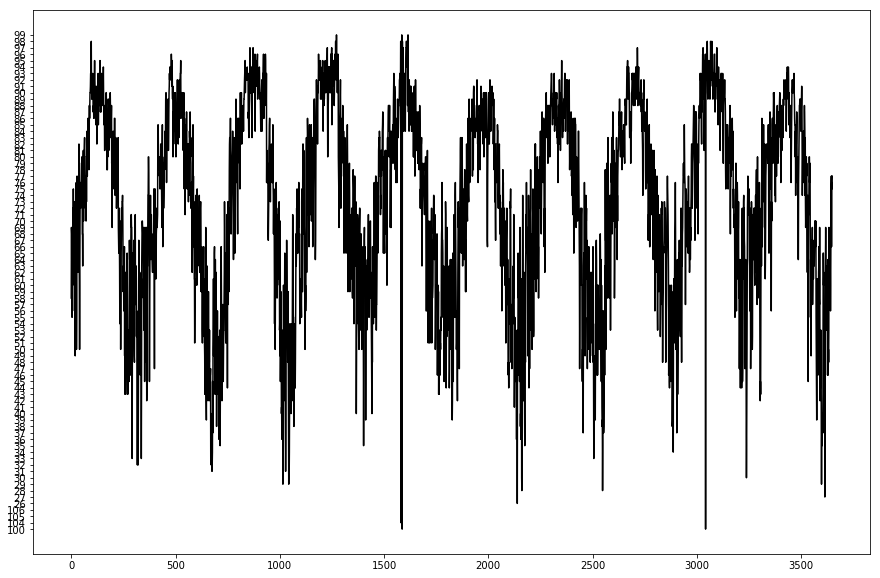

In [11]:
# Plotted to check to see that the table filled in data appropriately

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))
plt.plot(max_T[0:3650], 'k-')

In [12]:
# Repopulating our database with values from wunderground

for i in range(len(airports)):
    params = (ICAO1[i], dates[i], min_T[i], max_T[i], prec[i], hum[i])

    cursor.execute("INSERT INTO weather" + \
                   "(ICAO, date, min_T, max_T, precipitation, humidity)  " + \
                   "VALUES (?, ?, ?, ?, ?, ?)", params)

# Problem 4

In [13]:
# Define a function to find the geodesic distance between two points (found on Google! Yay!)

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [14]:
# Define empty lists to hold the correlation functions for each of the following variables 

airport1 = []
airport2 = []
maxTempCorr_1 = []
maxTempCorr_3 = []
maxTempCorr_7 = []
precipitationCorr_1 = []
precipitationCorr_3 = []
precipitationCorr_7 = []
distance = []
long_diff = []

In [15]:
# Define new sql table to hold the correlation functions

sql_cmd = """CREATE TABLE correlations_2 (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    airport_1 TEXT,
    airport_2 TEXT,
    max_temp_corr_1_day FLOAT,
    max_temp_corr_3_day FLOAT, 
    max_temp_corr_7_day FLOAT,
    precipitation_corr_1_day FLOAT,
    precipitation_corr_3_day FLOAT, 
    precipitation_corr_7_day FLOAT,
    distance FLOAT,
    long_diff FLOAT)"""

cursor.execute(sql_cmd)
connection.commit()

In [ ]:
# Selecting the data from the following columns from the airports table 

sql_cmd = "SELECT ICAO,latitude,longitude FROM airports"

# Making a pandas dataframe from the table 
rez_df = pd.read_sql_query(sql_cmd, connection)

# Populate the dataframe with the following values 

ICAO = rez_df['ICAO']
latitude = rez_df['latitude']
longitude = rez_df['longitude']

In [17]:
# For every permutation of airports, ca;culate the correlation coefficients and distances between airports and adding
# them to lists. 
# We use the np.roll() command to generate the correlation functions 

for i in range(len(ICAO)):
    # define airport code and cooridinates for the first airport
    airport_code_1 = ICAO[i]   
    lat1 = latitude[i]
    lon1 = longitude[i]
    
    # pull temperature and precipitation data for that airport 
    sql_cmd1 = "SELECT max_temp,precipitation FROM weather WHERE ICAO = '" + airport_code_1 + "'"
    rez_df1 = pd.read_sql_query(sql_cmd1, connection)
    ap1_max_temp = rez_df1['max_temp']
    ap1_precipitation = rez_df1['precipitation']
    
    for j in range(len(ICAO)):
        # define airport code and cooridinates for the first airport
        airport_code_2 = ICAO[j]
        lat2 = latitude[j]
        lon2 = longitude[j]
        
        # skip cases were both airports are the same
        if airport_code_1 == airport_code_2:
            continue
        else:
            # pull temperature and precipitation data for that airport 
            sql_cmd2 = "SELECT max_temp,precipitation FROM weather WHERE ICAO = '" + airport_code_2 + "'"
            rez_df2 = pd.read_sql_query(sql_cmd2, connection)
            ap2_max_temp = rez_df2['max_temp']
            ap2_precipitation = rez_df2['precipitation']
            
            # find the smaller array and set its size as the size limit
            size_lim = max(len(ap1_max_temp), len(ap2_max_temp))
            
            # add airport codes, correlation coefficients, and distances to our lists
            airport1.append(airport_code_1)
            airport2.append(airport_code_2)
            
            # Use np.roll() to find the correlations for temp and precipitation
            # Use 'size_lim' to populate the lists for the missing days, since we are missing data for some
            # dates in the table that had '-' or blanks. 
            
            maxTempCorr_1.append(np.corrcoef(np.resize(np.roll(ap1_max_temp, 1), size_lim), np.resize(ap2_max_temp, size_lim))[1,0])
            maxTempCorr_3.append(np.corrcoef(np.resize(np.roll(ap1_max_temp, 3), size_lim), np.resize(ap2_max_temp, size_lim))[1,0])
            maxTempCorr_7.append(np.corrcoef(np.resize(np.roll(ap1_max_temp, 7), size_lim), np.resize(ap2_max_temp, size_lim))[1,0])
            precipitationCorr_1.append(np.corrcoef(np.resize(np.roll(ap1_precipitation, 1), size_lim), np.resize(ap2_precipitation, size_lim))[1,0])
            precipitationCorr_3.append(np.corrcoef(np.resize(np.roll(ap1_precipitation, 3), size_lim), np.resize(ap2_precipitation, size_lim))[1,0])
            precipitationCorr_7.append(np.corrcoef(np.resize(np.roll(ap1_precipitation, 7), size_lim), np.resize(ap2_precipitation, size_lim))[1,0])
            
            # Use our geodesic distance function to append to our distance list 
            distance.append(haversine(lon1, lat1, lon2, lat2))
            
            # Subtract the longitudes to find the long. distance between the airports
            long_diff.append(abs(lon1-lon2))

/Users/sarafinanance/anaconda/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/sarafinanance/anaconda/envs/datascience/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


AttributeError: 'float' object has no attribute 'shape'

In [ ]:
# Re-populating our table with our correlation functions 

for i in range(len(airport1)):
    params = (airport1[i], airport2[i], maxTempCorr_1[i], maxTempCorr_3[i], maxTempCorr_7[i], precipitationCorr_1[i], precipitationCorr_3[i], precipitationCorr_7[i], distance[i], long_diff[i])
    cursor.execute("INSERT INTO correlations_2" + \
                   "(airport_1, airport_2, max_temp_corr_1_day, max_temp_corr_3_day, max_temp_corr_7_day, precipitation_corr_1_day, precipitation_corr_3_day, precipitation_corr_7_day, distance, long_diff)  " + \
                   "VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", params)

# Problem 5

In [ ]:
# Access our database to extract correlation functions and read them into a pandas dataframe

sql_cmd = "SELECT max_temp_corr_1_day,max_temp_corr_3_day,max_temp_corr_7_day,distance,precipitation_corr_1_day,precipitation_corr_3_day,precipitation_corr_7_day,long_diff FROM correlations2"
rez_df = pd.read_sql_query(sql_cmd, connection)

# Reading in values from the rez_df dataframe 

T_CORR_1 = rez_df['max_temp_corr_1_day']
T_CORR_3 = rez_df['max_temp_corr_3_day']
T_CORR_7 = rez_df['max_temp_corr_7_day']
P_CORR_1 = rez_df['precipitation_corr_1_day']
P_CORR_3 = rez_df['precipitation_corr_3_day']
P_CORR_7 = rez_df['precipitation_corr_7_day']
d = rez_df['distance']
ld = rez_df['long_diff']

In [ ]:
#
# Sorting list values based off of previous list in order to find the highest correlations
#

d_T_CORR_1 = [x for _,x in sorted(zip(T_CORR_1,d))]
d_T_CORR_3 = [x for _,x in sorted(zip(T_CORR_3,d))]
d_T_CORR_7 = [x for _,x in sorted(zip(T_CORR_7,d))]
ld_T_CORR_1 = [x for _,x in sorted(zip(T_CORR_1,ld))]
ld_T_CORR_3 = [x for _,x in sorted(zip(T_CORR_3,ld))]
ld_T_CORR_7 = [x for _,x in sorted(zip(T_CORR_7,ld))]

d_P_CORR_1 = [x for _,x in sorted(zip(P_CORR_1,d))]
d_P_CORR_3 = [x for _,x in sorted(zip(P_CORR_3,d))]
d_P_CORR_7 = [x for _,x in sorted(zip(P_CORR_7,d))]
ld_P_CORR_1 = [x for _,x in sorted(zip(P_CORR_1,ld))]
ld_P_CORR_3 = [x for _,x in sorted(zip(P_CORR_3,ld))]
ld_P_CORR_7 = [x for _,x in sorted(zip(P_CORR_7,ld))]

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

# Temperature correlation as a function of distance 

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(d_T_CORR_1[-11:-1], sorted(T_CORR_1)[-11:-1], 'ko')
ax1.plot(d_T_CORR_3[-11:-1], sorted(T_CORR_3)[-11:-1], 'r^')
ax1.plot(d_T_CORR_7[-11:-1], sorted(T_CORR_7)[-11:-1], 'gs')
plt.legend()

# Temperature correlation as a function of longitude 

ax2 = plt.subplot(2,1,2)
ax2.plot(ld_T_CORR_1[-11:-1], sorted(T_CORR_1)[-11:-1], 'ko')
ax2.plot(ld_T_CORR_3[-11:-1], sorted(T_CORR_3)[-11:-1], 'r^')
ax2.plot(ld_T_CORR_7[-11:-1], sorted(T_CORR_7)[-11:-1], 'gs')
plt.legend()

In [ ]:
print(d_T_CORR_1)

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

# Pressure correlation as a function of distance 

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(d_P_CORR_1[-11:-1], sorted(P_CORR_1)[-11:-1], 'ko')
ax1.plot(d_P_CORR_3[-11:-1], sorted(P_CORR_3)[-11:-1], 'r^')
ax1.plot(d_P_CORR_7[-11:-1], sorted(P_CORR_7)[-11:-1], 'gs')
plt.legend()

# Pressure correlation as a function of longitude 

ax2 = plt.subplot(2,1,2)
ax2.plot(ld_P_CORR_1[-11:-1], sorted(P_CORR_1)[-11:-1], 'ko')
ax2.plot(ld_P_CORR_3[-11:-1], sorted(P_CORR_3)[-11:-1], 'r^')
ax2.plot(ld_P_CORR_7[-11:-1], sorted(P_CORR_7)[-11:-1], 'gs')
plt.legend()